In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,f1_score,recall_score,precision_score


In [41]:
df = pd.read_csv("bank.csv")
df



,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [42]:
#target variable is term deposit i.e.column    deposit   
#feature variables are:age, job, marital, education, default, balance,housing, loan,contact, day, month, duration,campaign, pdays, previous, poutcome


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [44]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [45]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


In [46]:
cat_bank=pd.get_dummies(df,drop_first=True)
cat_bank

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,59,2343,5,1042,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True
1,56,45,5,1467,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True
2,41,1270,5,1389,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True
3,55,2476,5,579,1,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True
4,54,184,5,673,2,-1,0,False,False,False,...,False,False,True,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,True,False,False,...,False,False,False,False,False,False,False,False,True,False
11158,39,733,16,83,4,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,True,False
11159,32,29,19,156,2,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
11160,43,0,8,9,2,172,5,False,False,False,...,False,False,True,False,False,False,False,False,False,False


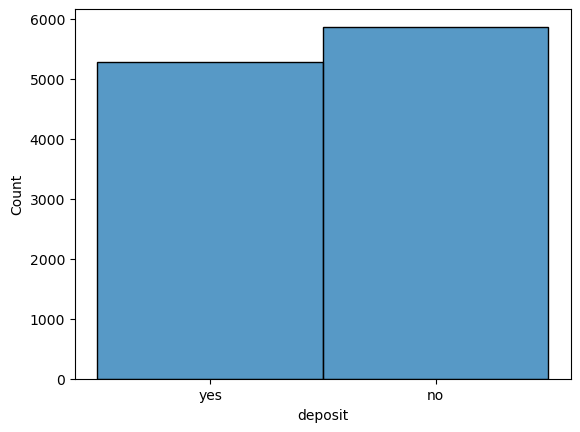

In [50]:
sns.histplot(df['deposit'])
plt.show()


In [48]:
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [51]:
x=cat_bank.drop(columns=['deposit_yes'])
y=cat_bank['deposit_yes']
x

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
1,56,45,5,1467,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,41,1270,5,1389,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,55,2476,5,579,1,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,54,184,5,673,2,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,True,False,False,...,False,False,False,False,False,False,False,False,False,True
11158,39,733,16,83,4,-1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,True
11159,32,29,19,156,2,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11160,43,0,8,9,2,172,5,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [52]:
y

0         True
1         True
2         True
3         True
4         True
         ...  
11157    False
11158    False
11159    False
11160    False
11161    False
Name: deposit_yes, Length: 11162, dtype: bool

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)


In [54]:
x_train

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
3955,28,5741,10,1042,5,200,3,False,False,False,...,False,False,False,False,False,False,True,False,False,False
11150,34,355,21,314,3,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5173,48,201,10,594,1,91,1,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3017,53,1961,15,351,1,-1,0,False,True,False,...,False,False,False,False,False,False,False,False,False,True
2910,53,1624,11,166,3,97,7,False,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,47,761,11,80,2,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
5191,28,159,16,449,2,33,4,False,False,False,...,False,False,False,False,True,False,False,False,True,False
5390,35,1144,20,197,13,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
860,51,746,25,372,5,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [55]:
y_train

3955      True
11150    False
5173      True
3017      True
2910      True
         ...  
5734     False
5191      True
5390     False
860       True
7270     False
Name: deposit_yes, Length: 8929, dtype: bool

In [57]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model

LogisticRegression()

In [58]:
model.fit(x_train,y_train)

C:\Users\amnas\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
y_pred=model.predict(x_test)
y_pred

array([False,  True,  True, ..., False,  True, False])

In [60]:
pd.DataFrame({'y_test':y_test, 'y_predict':y_pred})

,y_test,y_predict
5527,False,False
4541,True,True
1964,True,True
5007,True,True
8928,False,False
...,...,...
376,True,False
5544,False,False
10749,False,False
3881,True,True


In [66]:
print('accuracy_score', accuracy_score(y_test,y_pred))
print('classification report\n', classification_report(y_test,y_pred))
print('precision score\n', precision_score(y_test,y_pred))
print('recall score\n', recall_score(y_test,y_pred))
print('F1 Score\n', f1_score(y_test,y_pred))

accuracy_score 0.7447380206000895
classification report
               precision    recall  f1-score   support

       False       0.73      0.81      0.77      1166
        True       0.77      0.67      0.71      1067

    accuracy                           0.74      2233
   macro avg       0.75      0.74      0.74      2233
weighted avg       0.75      0.74      0.74      2233

precision score
 0.7669172932330827
recall score
 0.669165885660731
F1 Score
 0.7147147147147147


In [67]:
#Accuracy Score: 0.7447380206000895
#Precision Score: 0.7669172932330827
#F1 Score: 0.7147147147147147
#model correctly predicts 71% of all cases.
#- f1 combines precision and recall, so it reflects how well the model identifies the positive class 



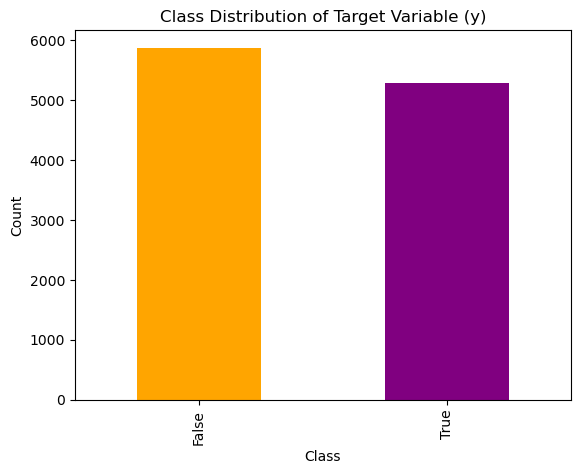

In [68]:
import matplotlib.pyplot as plt

y.value_counts().plot(kind='bar', color=['orange', 'purple'])
plt.title('Class Distribution of Target Variable (y)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()